# When do high doses outperform low doses?

Want to show when high doses win in the monogenic case.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [8]:
import pandas as pd

from math import floor, exp

from tqdm import tqdm

import copy

import seaborn as sns

import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


from plots2.fns import (
    standard_layout,
    corner_annotations_colwise,
    corner_annotations_rowwise,
    get_text_annotation
)

from poly2.utils import beta_dist, gamma_dist, edge_values
from poly2.config import Config, ConfigMixture
from poly2.simulator import (
    SimulatorOneTrait, SimulatorBothTraits,
    SimulatorMixture, SimulatorSimple,
    SimulatorSimpleWithDD
)

In [9]:
COLZ = sns.color_palette('muted').as_hex()

In [10]:
# doses = np.linspace(0,1,11)
doses = np.linspace(0,1,6)

In [11]:
def yield_plot(yield_list, title=None):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        ax.plot(dt, label=f'Dose = {doses[ind]:.2f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Yield')

    ax.legend()
    
    return f

In [12]:
def sev_plot(yield_list, title=None):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        ax.plot(100*dt, label=f'Dose = {doses[ind]:.2f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Severity (%)')

    ax.legend()
    
    return f

In [13]:
def av_yield_plot(yield_list, title=None):
    f, ax = plt.subplots()

    sns.set_palette("rocket", n_colors=len(yield_list))

    for ind, dt in enumerate(yield_list):
        av_yld = np.cumsum(dt) / np.arange(1, 1+len(dt))
        ax.plot(av_yld, label=f'Dose = {doses[ind]:.2f}')

    ax.set_title(title)

    ax.set_xlabel('Year')
    ax.set_ylabel('Average yield from start')

    ax.legend()
    
    return f

# Monogenic with k_2=/=1

In [106]:
ccf = Config(
    verbose=False, 
    n_k=101,
    # n_years=200,
    n_years=100,
)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

# ccf.betas = ccf.betas*100

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 101
n_l = 50
n_years = 100
replace_cultivars = None
sprays = None
type = single



In [146]:
init_dist = np.zeros(ccf.n_k)

pr = 1e-6

init_dist[5] = 1-pr
init_dist[-5] = pr

In [147]:
doses = np.linspace(0,1,4)[1:]

data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    # sim = SimulatorSimpleWithDD(ccf)
    sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = init_dist
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])

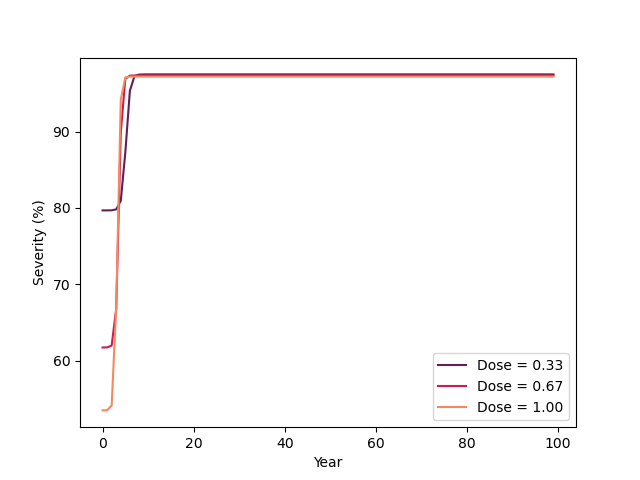

In [148]:
f = sev_plot(data_sp_list)

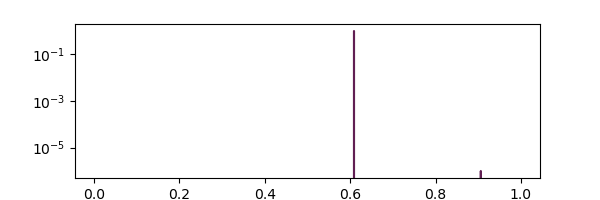

In [114]:
f, ax = plt.subplots(figsize=(6,2))
ax.plot(data['k_vec'], init_dist)
ax.set_yscale('log')

Usual monogenic, low dose best: `pr = 1e-6, init_dist: [5], [-1]`

High doses best: `pr = 1e-4 OR 1e-2, init_dist: [-15], [-10], n_years=200`

High doses best (exaggerated): `pr = 1e-6, init_dist: [5], [25]`. This one uses curvature effect and possibly even means resistance develops slower at high doses??

Closer together strains increases chances that high doses do well?

Higher `pr` decreases time to see an improvement from using low dose to reduce selection, so means low doses relatively worse (e.g. think about `pr` close to 1, then high dose always better).

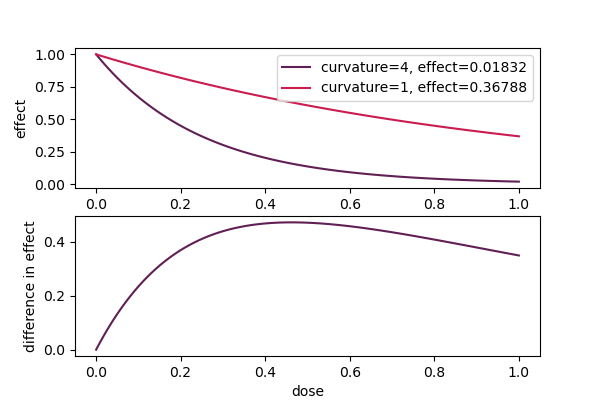

In [133]:
f, (ax, ax2) = plt.subplots(2, 1, figsize=(6,4))

x = np.linspace(0, 1, 100)

c1 = 4
c2 = 1

dr1 = np.exp(-c1*x)
dr2 = np.exp(-c2*x)

ax.plot(x, dr1, label=f'curvature={c1}, effect={exp(-c1):.5f}')
ax.plot(x, dr2, label=f'curvature={c2}, effect={exp(-c2):.5f}')

ax2.plot(x, dr2-dr1)

ax2.set_xlabel('dose')
ax.set_ylabel('effect')
ax2.set_ylabel('difference in effect')
ax.legend()

.

.

.

.

.

.

.

.

.

.


# Exponential initial dist

In [422]:
ccf = Config(
    verbose=False, 
    n_k=101,
    n_years=400,
)

ccf.mutation_proportion = None
ccf.mutation_scale_fung = None
ccf.mutation_scale_host = None

# ccf.betas = ccf.betas*100

ccf.print_repr()

CONFIG
------
I0s = [0.00985703, 0.00985703, 0.00985703, 0.00985 ...
betas = [0.00786542, 0.00786542, 0.00786542, 0.007 ...
decay_rate = None
doses = [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1 ...
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = None
mutation_scale_fung = None
mutation_scale_host = None
n_k = 101
n_l = 50
n_years = 400
replace_cultivars = None
sprays = None
type = single



In [424]:
xx = edge_values(101)

L = 100

exp_dist = np.array(
    [ exp(-L*xx[ii+1]) - exp(-L*xx[ii]) for ii in range(len(xx)-1)]
)

exp_dist = exp_dist/exp_dist.sum()

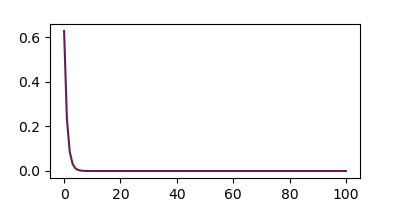

In [425]:
f,ax = plt.subplots(figsize=(4,2))

ax.plot(exp_dist)

In [426]:
doses = np.linspace(0,1,4)[1:]

data_sp_list = []

for dd in doses:
    ccf.doses = dd*np.ones(ccf.n_years)
    
    # sim = SimulatorSimpleWithDD(ccf)
    sim = SimulatorSimple(ccf)
    
    sim.initial_k_dist = exp_dist
    
    data = sim.run_model()
    
    data_sp_list.append(data['dis_sev'])

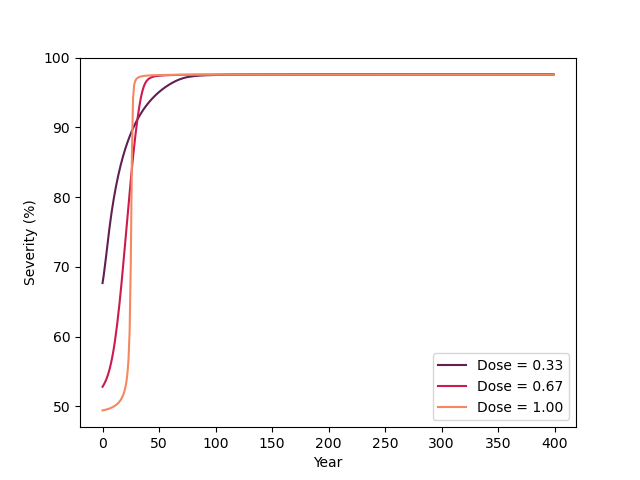

In [427]:
f = sev_plot(data_sp_list)

Running with `L=100`, `years=400` gives us an example with transient behaviour - short and long run high doses best but medium low doses are.